In [34]:
import pandas as pd
from data_provider import DataProvider
import numpy as np

In [2]:
data=DataProvider()

In [7]:
df=data.data
df

,BSP,TWA,TWS,adjTWA
2021-06-01 07:45:45,0.718,-0.023187,8.311917,0.023187
2021-06-01 07:46:35,1.424,0.035868,7.528591,0.035868
2021-02-08 14:51:15,2.424,-0.074437,14.524940,0.074437
2021-06-02 11:41:10,2.088,0.078632,8.785691,0.078632
2021-06-02 07:53:30,1.234,0.092154,11.253189,0.092154
...,...,...,...,...
2021-06-02 11:34:30,4.126,179.300344,9.986638,179.300344
2021-06-02 11:35:45,4.254,-179.384010,11.643191,179.384010
2021-05-31 15:00:25,4.700,179.427890,5.116968,179.427890
2021-05-31 15:01:20,4.672,179.449560,5.007625,179.449560


In [15]:
df=df.reset_index(drop=True)
df=df[['BSP','TWS','adjTWA']]
df

,BSP,TWS,adjTWA
0,0.718,8.311917,0.023187
1,1.424,7.528591,0.035868
2,2.424,14.524940,0.074437
3,2.088,8.785691,0.078632
4,1.234,11.253189,0.092154
...,...,...,...
483123,4.126,9.986638,179.300344
483124,4.254,11.643191,179.384010
483125,4.700,5.116968,179.427890
483126,4.672,5.007625,179.449560


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_selector as selector
from sklearn.decomposition import PCA
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression,RidgeCV

In [18]:
X=df.drop('BSP',axis=1)
y=df['BSP']

<AxesSubplot:xlabel='adjTWA', ylabel='BSP'>

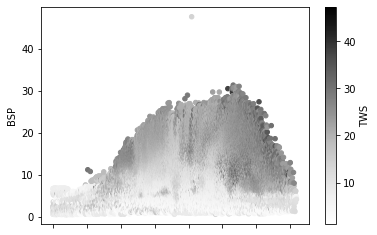

In [69]:
df.plot(y='BSP',x='adjTWA',c='TWS',colorbar=True,kind='scatter')

In [20]:
SEED=0

In [22]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2,random_state=SEED)

In [23]:
X_train

,TWS,adjTWA
21010,20.064280,59.24522
164515,14.107280,81.80594
97876,5.412257,74.68721
251345,6.534540,116.95350
43417,18.047640,66.69284
...,...,...
237318,17.503800,113.47120
189482,15.175520,91.52878
293216,6.049192,125.59340
18821,17.379820,58.55323


In [41]:
y_train.loc[344854]

14.899000000000001

In [45]:
clf=Pipeline(
    steps=[("preprocessor", StandardScaler()), ("regressor", RandomForestRegressor())]
)

In [46]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_train, y_train))

model score: 0.953


In [47]:
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.661


In [70]:
clf.predict(np.array(X_val.iloc[10]).reshape(1, -1))

c:\users\edoardo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([16.74941])

In [71]:
from tensorflow import keras

In [73]:
imp_shape=(2,1)

In [137]:
keras.backend.clear_session()
inputs = keras.Input(shape=imp_shape)
output1 = keras.layers.Dense(64, activation='relu')(inputs)
output1 = keras.layers.Dense(32, activation='relu')(output1)
output1 = keras.layers.Dense(32, activation='relu')(output1)
output1 = keras.layers.Dense(32, activation='relu')(output1)
output1 = keras.layers.Dense(16, activation='relu')(output1)
output1 = keras.layers.Dense(16, activation='relu')(output1)
output1 = keras.layers.Dense(1)(output1)
model=keras.Model(inputs=inputs, outputs=output1)

optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mean_absolute_error'])

In [138]:
history=model.fit(X_train, y_train,epochs=50)

Epoch 1/50
9663/9663 [==============================] - 10s 978us/step - loss: 32.3387 - mean_absolute_error: 4.1827
Epoch 2/50
9663/9663 [==============================] - 9s 968us/step - loss: 15.8482 - mean_absolute_error: 3.0513
Epoch 3/50
9663/9663 [==============================] - 9s 969us/step - loss: 15.8010 - mean_absolute_error: 3.0423
Epoch 4/50
9663/9663 [==============================] - 10s 1ms/step - loss: 15.7495 - mean_absolute_error: 3.0356
Epoch 5/50
9663/9663 [==============================] - 9s 972us/step - loss: 15.7231 - mean_absolute_error: 3.0334
Epoch 6/50
9663/9663 [==============================] - 9s 962us/step - loss: 15.7212 - mean_absolute_error: 3.0326
Epoch 7/50
9663/9663 [==============================] - 9s 977us/step - loss: 15.5974 - mean_absolute_error: 3.0210
Epoch 8/50
9663/9663 [==============================] - 9s 971us/step - loss: 15.3769 - mean_absolute_error: 3.0006
Epoch 9/50
9663/9663 [==============================] - 9s 967us/step - 

In [139]:
model.predict(np.array([18.99645, 129.95310])[np.newaxis])

array([[[16.442287],
        [16.487495]]], dtype=float32)

In [140]:
test=10
print(X_val.iloc[test])
y_val.iloc[test]

TWS        18.99645
adjTWA    129.95310
Name: 321892, dtype: float64


22.189999999999998

In [141]:
pred=model.predict(X_val)

In [142]:
X_val

,TWS,adjTWA
456491,24.04735,146.49790
225233,19.13085,110.21260
321621,21.46890,129.91880
217477,20.12584,107.90190
230737,13.14903,111.65490
...,...,...
150261,24.43253,80.09602
373486,19.26134,135.06650
381556,17.78145,135.81810
205488,20.00200,101.25240
